# Homework Part 1
---
- Build and train a MLP Model to classify Mnist dataset

    1. MLP Network accepts 1D data. So we should flatten our 2D image, then print the dimension of the result arrays.

    2. Normalize data by rescaling them to (0,1)

    3. Convert label arrays to 1-hot representation (keras.utils.to_categorical)

    4. Define Model

        - Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
        - Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
        - Output Layer: Fully Connected + Softmax Activition

- Also build another model with BatchNormalization and Dropout. Compare these two CNN + MLP models performance for test data

# Importing the Packages 
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting the digit image
%matplotlib inline  
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.initializers import RandomNormal
from keras.callbacks import TensorBoard

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


# Loading the Data
---

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Check the random image and its label

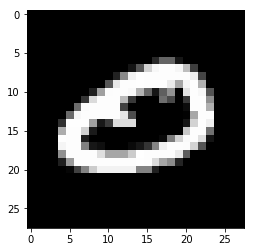

label: 0


In [3]:
rand_num = np.random.randint(60000)

plt.imshow(X_train[rand_num], cmap="gray")
plt.show()

# print its label
print('label:', y_train[rand_num])

### The Network accept 1D data. So we need to flatten our 2D image, then print the dimension of the result arrays.

In [4]:
X_train.shape

(60000, 28, 28)

### Reshaping, Normalizing, one-hot-coding

In [5]:
# reshape the data 
# NOTE: when data is big it is better to do reshaping and normalinzing inplace, bc copying the opject takes up a lot
# of memory space
NUM_CLASSES = 10
X_train = np.reshape(X_train, [-1, 28*28]).astype('float32')
X_test = np.reshape(X_test, [-1, 28*28]).astype('float32')

# Normalize data by rescaling them to (0,1)
X_train /= 255
X_test /= 255

# Convert label arrays to 1-hot representation
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)


In [6]:
print('train shape: ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

train shape:  (60000, 784)
60000 train samples
10000 test samples


## Define the Model
---

### Add the following layers to the network:

- Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
- Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
- Outout Layer: Fully Connected + Softmax Activition

In [7]:
# initialize the model
model = Sequential()
# Add the layers to model here.
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=RandomNormal(0,0.01)))
model.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(0,0.01)))
# Output Layer: Fully Connected + Softmax Activition
model.add(Dense(10, activation='softmax', kernel_initializer=RandomNormal(0,0.01)))

### Determine loss function, optimizer and metrics for the model

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [10]:
batch_size = 128
epochs = 10
model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.3054 - acc: 0.9051 - val_loss: 0.1449 - val_acc: 0.9549
Epoch 2/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.1024 - acc: 0.9688 - val_loss: 0.0860 - val_acc: 0.9747
Epoch 3/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0662 - acc: 0.9797 - val_loss: 0.0785 - val_acc: 0.9779
Epoch 4/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0487 - acc: 0.9852 - val_loss: 0.0796 - val_acc: 0.9781
Epoch 5/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0368 - acc: 0.9887 - val_loss: 0.0765 - val_acc: 0.9814
Epoch 6/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0279 - acc: 0.9909 - val_loss: 0.0820 - val_acc: 0.9835
Epoch 7/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0229 - acc: 0.9934 - val_loss: 0.

### Print the review of the model

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
